In [5]:
#  IMPORT ALL libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("unclean_students.csv")
df


Saving unclean_students.csv to unclean_students (2).csv


,student_id,name,attendance,study_hours,previous_scores,assignments_completed,final_result
0,1,Ahmed,NaN,unknown,NaN,NaN,fail
1,2,Fatima,NaN,five,NaN,NaN,unknown
2,3,Ali,36.0,NaN,NaN,NaN,fail
3,4,Sara,59.0,five,65.0,missing,Fail
4,5,Fatima,NaN,five,NaN,11,PASS
...,...,...,...,...,...,...,...
100,84,Ahmed,52.0,five,71.0,NaN,Fail
101,54,Sara,NaN,five,29.0,7,unknown
102,71,Ali,33.0,NaN,NaN,NaN,PASS
103,46,Zain,NaN,five,NaN,missing,Fail


In [7]:
df

,student_id,name,attendance,study_hours,previous_scores,assignments_completed,final_result
0,1,Ahmed,NaN,unknown,NaN,NaN,fail
1,2,Fatima,NaN,five,NaN,NaN,unknown
2,3,Ali,36.0,NaN,NaN,NaN,fail
3,4,Sara,59.0,five,65.0,missing,Fail
4,5,Fatima,NaN,five,NaN,11,PASS
...,...,...,...,...,...,...,...
100,84,Ahmed,52.0,five,71.0,NaN,Fail
101,54,Sara,NaN,five,29.0,7,unknown
102,71,Ali,33.0,NaN,NaN,NaN,PASS
103,46,Zain,NaN,five,NaN,missing,Fail


In [10]:
# Identify missing values in each column
df.isnull().sum()

,0
student_id,0
name,0
attendance,72
study_hours,32
previous_scores,60
assignments_completed,38
final_result,0


In [13]:
# Fill missing values in numeric columns with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [15]:
df.isnull().sum()

,0
student_id,0
name,0
attendance,0
study_hours,0
previous_scores,0
assignments_completed,0
final_result,0


In [16]:
# Remove unwanted spaces and convert text to lowercase for consistency
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

In [17]:
# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
df

,student_id,name,attendance,study_hours,previous_scores,assignments_completed,final_result
0,1,0,55.969697,17,58.911111,9,0
1,2,4,55.969697,16,58.911111,9,2
2,3,1,36.000000,16,58.911111,9,0
3,4,7,59.000000,16,65.000000,9,0
4,5,4,55.969697,16,58.911111,1,1
...,...,...,...,...,...,...,...
100,84,0,52.000000,16,71.000000,9,0
101,54,7,55.969697,16,29.000000,7,2
102,71,1,33.000000,16,58.911111,9,1
103,46,9,55.969697,16,58.911111,9,0


In [19]:
# Display basic statistics of cleaned data
df.describe()

,student_id,name,attendance,study_hours,previous_scores,assignments_completed,final_result
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,50.952381,4.161905,55.969697,14.800000,58.911111,7.514286,0.828571
std,28.573246,3.141300,10.429696,3.752948,14.564064,2.627935,0.739765
min,1.000000,0.000000,31.000000,0.000000,23.000000,0.000000,0.000000
25%,27.000000,1.000000,55.969697,16.000000,58.911111,7.000000,0.000000
50%,51.000000,4.000000,55.969697,16.000000,58.911111,9.000000,1.000000
75%,75.000000,7.000000,55.969697,16.000000,58.911111,9.000000,1.000000
max,100.000000,9.000000,95.000000,17.000000,99.000000,9.000000,2.000000


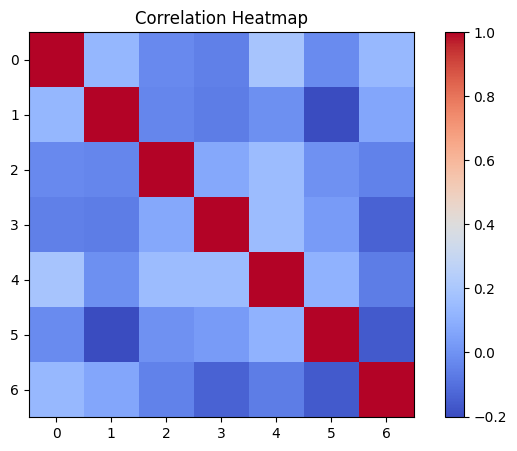

In [23]:
# Plot correlation heatmap to visualize relationships between features
plt.figure(figsize=(8,5))
plt.imshow(df.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

In [26]:
df.columns

Index(['student_id', 'name', 'attendance', 'study_hours', 'previous_scores',
       'assignments_completed', 'final_result'],
      dtype='object')

In [27]:
# Separate features and target variable
X = df.drop("final_result", axis=1)
y = df["final_result"]

In [28]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict on test data using Linear Regression
y_pred_lr = lr.predict(X_test)


In [31]:
# Evaluate Linear Regression model
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [32]:
print("\nLinear Regression Results:")
print(f"R² Score: {r2_lr:.4f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"Root Mean Squared Error: {rmse_lr:.2f}")


Linear Regression Results:
R² Score: -0.1804
Mean Absolute Error: 0.63
Root Mean Squared Error: 0.74


In [33]:
# Train a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [34]:
# Predict using Decision Tree
y_pred_dt = dt.predict(X_test)

In [35]:
# Evaluate Decision Tree model
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

print("\nDecision Tree Results:")
print(f"R² Score: {r2_dt:.4f}")
print(f"Mean Absolute Error: {mae_dt:.2f}")
print(f"Root Mean Squared Error: {rmse_dt:.2f}")


Decision Tree Results:
R² Score: -0.3050
Mean Absolute Error: 0.54
Root Mean Squared Error: 0.78



Model Performance Comparison:
               Model  R² Score       MAE      RMSE
0  Linear Regression -0.180432  0.628915  0.742565
1      Decision Tree -0.305015  0.537377  0.780768


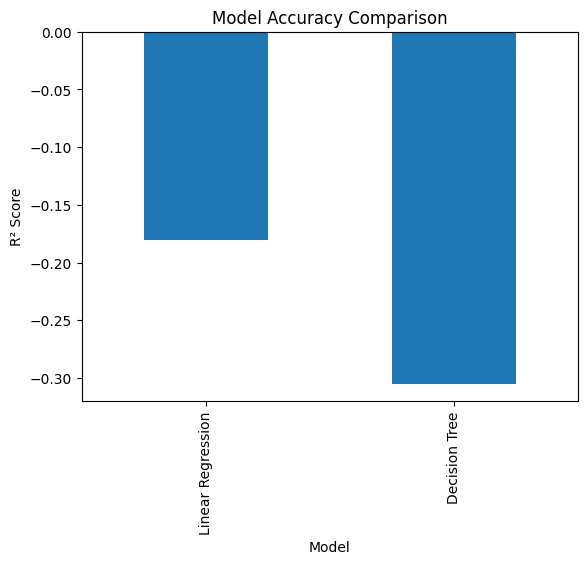

In [36]:
# Compare both model performances in a DataFrame
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "R² Score": [r2_lr, r2_dt],
    "MAE": [mae_lr, mae_dt],
    "RMSE": [rmse_lr, rmse_dt]
})

print("\nModel Performance Comparison:")
print(results)

# Visualize comparison of R² scores
results.plot(x="Model", y=["R² Score"], kind="bar", title="Model Accuracy Comparison", legend=False)
plt.ylabel("R² Score")
plt.show()